### Week9 
Singular Value Decomposition (SVD), 
Principal Component Analysis (PCA), 
Empirical Orthogonal Function (EOF) Analysis

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
### load data and set up data matrix, after 1962-

In [111]:
city=['ATL','BOS','ANC','PAS']
df2=pd.read_csv('Temp_Jan_4USCities.csv',index_col=0)
year=df2.index # get time axis
N=np.size(year)
TMP=df2.values # get Temperature values
M=TMP.mean(axis=0) # get the climatological mean
TMP_ano=TMP-M # get the anomalies
df_ano=pd.DataFrame(data=TMP_ano,columns=city,index=year)
df_ano # display data
M

array([42.70689655, 29.40172414, 15.99827586, 56.66551724])

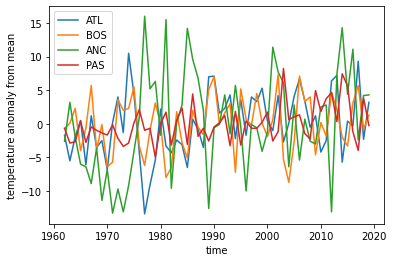

In [112]:
### make a plot to take a quick look
figure=plt.figure()
plt.plot(year,TMP_ano)
plt.legend(city)
plt.xlabel('time')
plt.ylabel('temperature anomaly from mean')
plt.show()

In [113]:
# covariance matrix
C=np.cov(TMP_ano.T,ddof=1)
df_C=pd.DataFrame(C,columns=city,index=city)
df_C

,ATL,BOS,ANC,PAS
ATL,22.035741,11.572795,-12.949111,-0.806249
BOS,11.572795,16.632102,-6.218944,-3.464325
ANC,-12.949111,-6.218944,56.159120,4.949940
PAS,-0.806249,-3.464325,4.949940,7.735632


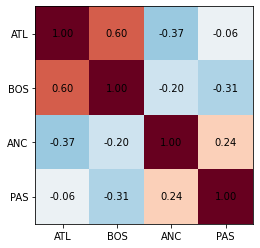

In [114]:
# correlation matrix
r_mat=np.corrcoef(TMP_ano.T)

fig, ax = plt.subplots()
ax.imshow(r_mat,vmax=1,vmin=-1,cmap=plt.get_cmap('RdBu_r'))
# ax.colormap
ax.set_xticks(np.arange(len(city)))
ax.set_yticks(np.arange(len(city)))
ax.set_xticklabels(city)
ax.set_yticklabels(city)
# Loop over data dimensions and create text annotations.
for i in range(len(city)):
    for j in range(len(city)):
        text = ax.text(j, i, "{:.2f}".format(r_mat[i, j]), ha="center", va="center", color="k")

plt.show()

In [116]:
# PCA using eigen decomposition
# find the principal components
[eigen_values, eigen_vectors]=np.linalg.eig(C)
print('\n Covariance matrix \n',C)
print('\n Eigen values \n',eigen_values)
print('\n Eigen vectors \n',eigen_vectors)

# project X to PC space
X=TMP_ano
Y_PCA=X@eigen_vectors
print('\n Projected X onto PC space \n',Y_PCA)


 Covariance matrix 
 [[ 22.03574108  11.57279492 -12.94911071  -0.80624924]
 [ 11.57279492  16.63210224  -6.21894434  -3.46432547]
 [-12.94911071  -6.21894434  56.15911978   4.9499395 ]
 [ -0.80624924  -3.46432547   4.9499395    7.73563218]]

 Eigen values 
 [63.15005636 25.05578013  4.73061819  9.6261406 ]

 Eigen vectors 
 [[ 0.3481882   0.66317646 -0.42043855  0.51204823]
 [ 0.21528135  0.62644545  0.55900309 -0.49873398]
 [-0.90692416  0.4076639  -0.10628557  0.00144642]
 [-0.09953637 -0.03966391  0.70671801  0.69933464]]

 Projected X onto PC space 
 [[ 1.67729297e+00 -2.60439176e+00  1.31205375e-01 -9.93217137e-01]
 [-4.51477720e+00 -2.17159470e+00  4.83840953e-03 -4.86813456e+00]
 [ 1.90841763e+00 -5.33764522e-01  4.15094980e-01 -3.98963015e+00]
 [ 4.70693069e+00 -4.64236111e+00 -1.49970887e+00  2.54346138e+00]
 [ 3.82213122e+00 -6.92555222e+00  9.56812675e-01 -4.77020187e+00]
 [ 9.75855430e+00  7.51855524e-01  3.30049603e+00 -2.56942026e+00]
 [ 1.29843897e+00 -6.19849956e+00 -

In [108]:
# PCA using SVD
U,S,Vt=np.linalg.svd(TMP_ano,full_matrices=False)
print('\n Right singular vector matrix, V \n',Vt.T)
print('\n Singular values, S \n',S)
print('\n Left singular vector matrix, U \n',U)


 Right singular vector matrix, V 
 [[ 0.3481882  -0.66317646  0.51204823 -0.42043855]
 [ 0.21528135 -0.62644545 -0.49873398  0.55900309]
 [-0.90692416 -0.4076639   0.00144642 -0.10628557]
 [-0.09953637  0.03966391  0.69933464  0.70671801]]

 Singular values, S 
 [59.99627666 37.79126179 23.42413316 16.42087808]

 Left singular vector matrix, U 
 [[ 2.79566177e-02  6.89151839e-02 -4.24014468e-02  7.99015586e-03]
 [-7.52509565e-02  5.74628790e-02 -2.07825602e-01  2.94649867e-04]
 [ 3.18089344e-02  1.41240196e-02 -1.70321357e-01  2.52784886e-02]
 [ 7.84537133e-02  1.22842183e-01  1.08582946e-01 -9.13293958e-02]
 [ 6.37061404e-02  1.83258031e-01 -2.03644756e-01  5.82680579e-02]
 [ 1.62652665e-01 -1.98949569e-02 -1.09691157e-01  2.00993882e-01]
 [ 2.16419925e-02  1.64019386e-01 -2.26348619e-02 -6.12966572e-02]
 [ 1.59651895e-01  1.67201171e-01 -9.41063144e-02  7.57309379e-02]
 [ 4.30534603e-02  2.97154811e-01 -6.26400558e-02 -7.13234818e-02]
 [ 1.81957360e-01  2.34403908e-01  1.19856518e-0

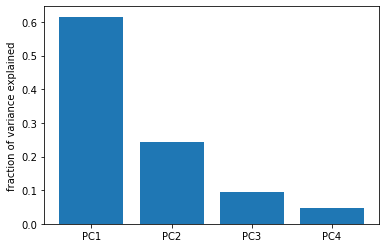

In [97]:
# display the variance explained by the singular vectors (principal components)
expvar=S**2/np.sum(S**2)
plt.bar(['PC1','PC2','PC3','PC4'],expvar)
plt.ylabel('fraction of variance explained')
plt.show()

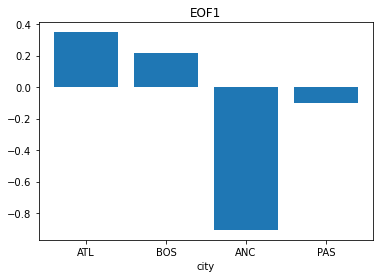

In [93]:
# plot the EOF1 pattern
EOF=Vt.T
plt.bar(city,EOF[:,0])
plt.xlabel('city')
plt.title('EOF1')
plt.show()

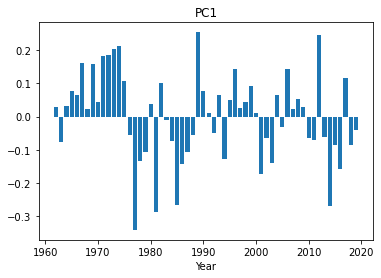

In [96]:
# plot the time series of EOF1 (principal component 1)
PC=U
plt.bar(year,PC[:,0])
plt.xlabel('Year')
plt.title('PC1')
plt.show()

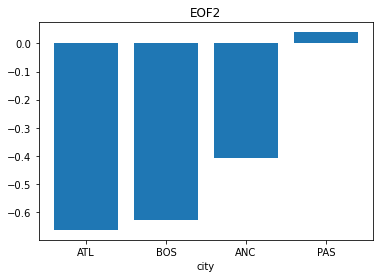

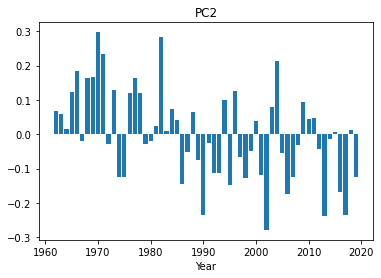

In [109]:
# plot the second PC
plt.bar(city,EOF[:,1])
plt.xlabel('city')
plt.title('EOF2')
plt.show()

plt.bar(year,PC[:,1])
plt.xlabel('Year')
plt.title('PC2')
plt.show()